In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [77]:
train = pd.read_csv("C:/Users/Jason Chong/Documents/Kaggle/house-prices/train.csv")
test = pd.read_csv("C:/Users/Jason Chong/Documents/Kaggle/house-prices/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Training and test set shape

print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (1460, 81)
Test set shape:  (1459, 80)


In [80]:
train_missing = train.isnull().sum()
train_missing[train_missing > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [81]:
test_missing = test.isnull().sum()
test_missing[test_missing > 0].sort_values(ascending = False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [6]:
# Descriptive statistics

train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
# Data types

train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

Text(0.5, 1.0, 'Sale Price Distribution')

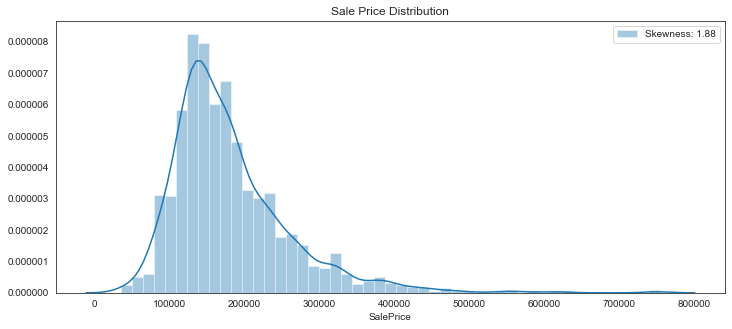

In [8]:
# Sale price distribution

plt.figure(figsize = (12, 5))
sns.set_style('white')
sns.distplot(train['SalePrice'], label = 'Skewness: %.2f'%train['SalePrice'].skew())
plt.legend(loc = 'best')
plt.title('Sale Price Distribution')

In [9]:
# Skewness and kurtosis

print("Skewness: %f"%train['SalePrice'].skew())
print("Kurtosis: %f"%train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


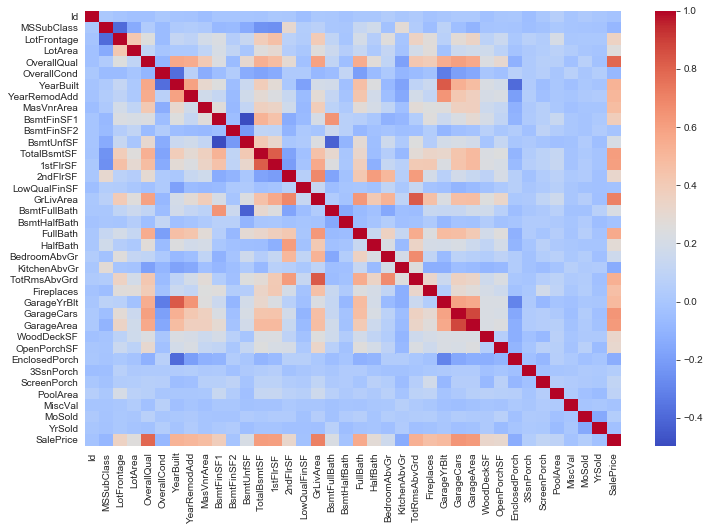

In [10]:
# Numerical variables correlation

corr = train.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, cmap = 'coolwarm')

# Comment: There are signs of multicollinearity between some features, can potentailly remove them to prevent overfitting 

There is a strong correlation between:

- TotalBsmtSF and 1stFlrSF
- GarageCars and GarageArea
- GarageYrBlt and YearBuilt
- TotRmsAbvGrd and GrLivArea

In [11]:
corr['SalePrice'].sort_values(ascending = False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

We observe that many of the top 10 most correlated features also have correlation with each other. If there is a correlated pair, I will choose to plot the feature that has a higher correlation with SalePrice.

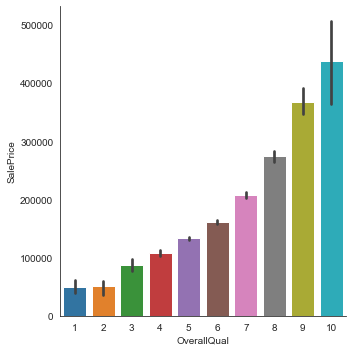

In [12]:
sns.set_style('white')
sns.factorplot(x = 'OverallQual', y = 'SalePrice', data = train, kind = 'bar')

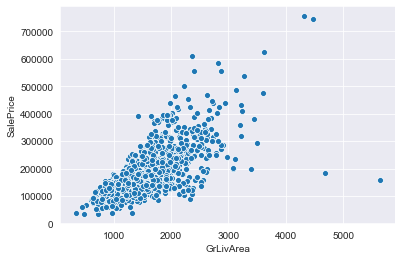

In [13]:
sns.set_style('darkgrid')
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = train)

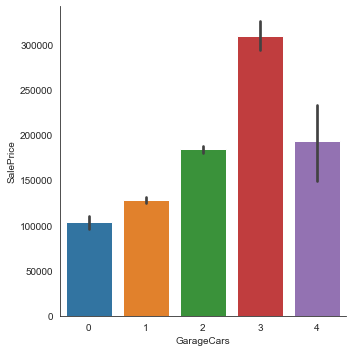

In [14]:
sns.set_style('white')
sns.factorplot(x = 'GarageCars', y = 'SalePrice', data = train, kind = 'bar')

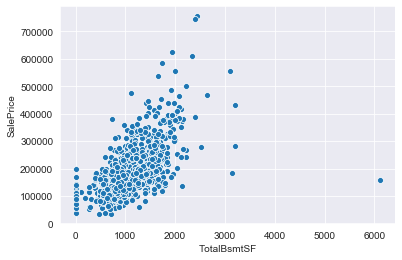

In [15]:
sns.set_style('darkgrid')
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = train)

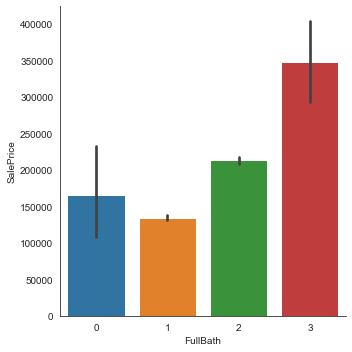

In [16]:
sns.set_style('white')
sns.factorplot(x = 'FullBath', y = 'SalePrice', data = train, kind = 'bar')

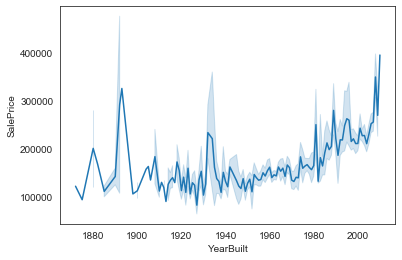

In [17]:
sns.set_style('white')
sns.lineplot(x = 'YearBuilt', y = 'SalePrice', data = train)

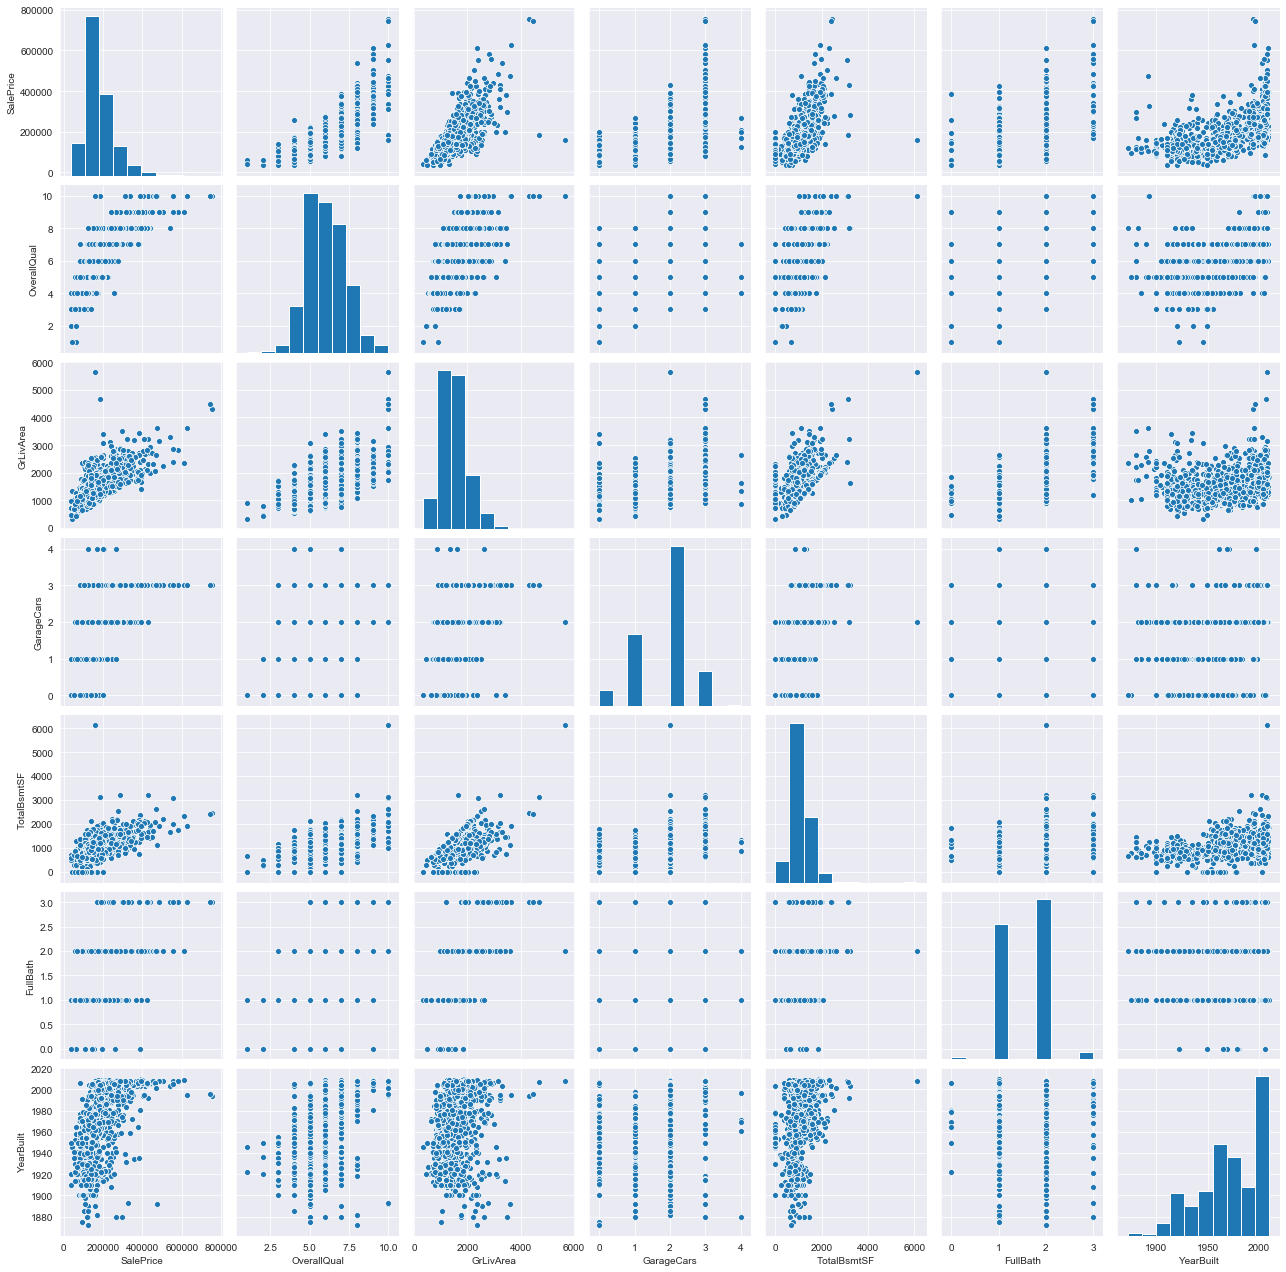

In [18]:
# Create a mega scatter plot

sns.set_style('darkgrid')
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols])

In [19]:
# Missing data

missing = train.isnull().sum()
missing = missing[missing > 0]
percent_missing = missing / len(train)
missing_df = pd.concat([missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
missing_df.sort_values(by = 'Total', ascending = False, inplace = True)
missing_df

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


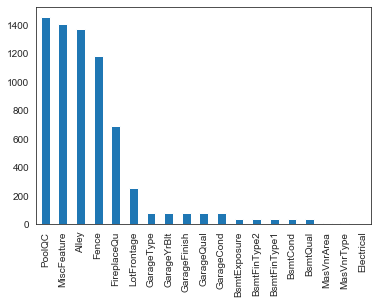

In [20]:
sns.set_style('white')
missing_df['Total'].plot(kind = 'bar')

In [21]:
# Features to drop

features_to_drop = missing_df[missing_df['Total'] > 1].index
print(f"We are dropping {len(features_to_drop)} features from the training set. ")

We are dropping 18 features from the training set. 


In [22]:
list(features_to_drop)

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType']

In [82]:
# Drop all features with null values except Electrical from training and test set 

train = train.drop(columns = features_to_drop, axis = 1)
test = test.drop(columns = features_to_drop, axis = 1)

In [85]:
test_missing = test.isnull().sum()
test_missing[test_missing > 0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [24]:
# Drop row in Electrical with null value or alternaively we can fillna with mode

train = train.drop(train[train['Electrical'].isnull()].index)

In [25]:
# Make sure there is no more missing data

train.isnull().sum().max()

0

In [26]:
# Get numerical features from training set 

numerical_features = train.select_dtypes(include = [np.number])
numerical_features.drop('Id', axis = 1, inplace = True)
list(numerical_features)

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [27]:
# Detect outliers using Tukey method

def detect_outliers(df, n, features):
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 3, numerical_features.columns)
print(f"We are dropping {len(outliers_to_drop)} observations. ")

We are dropping 59 observations. 


In [28]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 1459 rows
After: 1400 rows


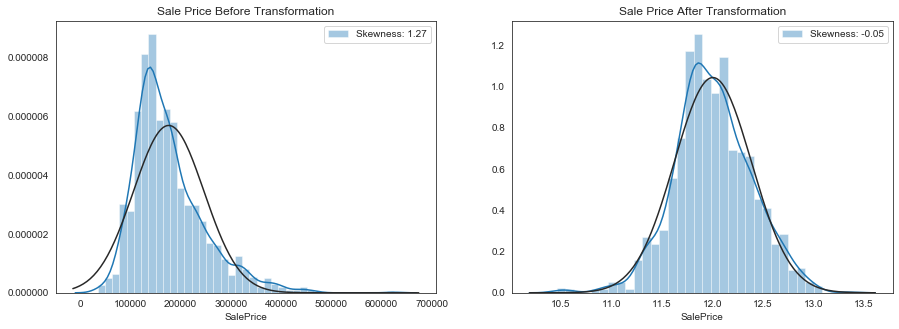

In [29]:
# Create axes to draw plots
fig, ax = plt.subplots(1, 2)

# Plot original SalePrice distribution
sns.distplot(train['SalePrice'], fit = norm, label = 'Skewness: %.2f'%train['SalePrice'].skew(), ax = ax[0])
ax[0].legend(loc = 'best')
ax[0].title.set_text('Sale Price Before Transformation')

# Apply box-cox transformation
train['SalePrice'] = np.log(train['SalePrice'])

# Plot transformed SalePrice distribution
sns.distplot(train['SalePrice'], fit = norm, label = 'Skewness: %.2f'%train['SalePrice'].skew(), ax = ax[1])
ax[1].legend(loc = 'best')
ax[1].title.set_text('Sale Price After Transformation')

# Rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(15)

In [30]:
combine = pd.concat([train, test], ignore_index = True)
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)
print("Combine shape: ", combine.shape)

Training set shape:  (1400, 63)
Test set shape:  (1459, 62)
Combine shape:  (2859, 63)


In [31]:
combine = pd.get_dummies(combine)
combine.shape

(2859, 220)

In [32]:
train = combine[:len(train)]
test = combine[len(train):]

In [33]:
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
test.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1400,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1401,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
1402,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
1403,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
1404,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
# Drop Id from training set and SalePrice from test set

train = train.drop('Id', axis = 1)
test = test.drop('SalePrice', axis = 1)

In [36]:
# Store test Id in a separate variable and drop from test set

test_id = test['Id']
test = test.drop('Id', axis = 1)

## Modelling

In [38]:
Y_train = train['SalePrice']
X_train = train.drop('SalePrice', axis = 1)
X_test = test

In [39]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (1400, 218)
Y_train shape:  (1400,)
X_test shape:  (1459, 218)


In [40]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor

In [41]:
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X = X_train):
    rmse = np.sqrt(-cross_val_score(model, X, Y_train, scoring = 'neg_mean_squared_error', cv = kfolds))
    return rmse

In [48]:
ridge = make_pipeline(RobustScaler(), RidgeCV())
lasso = make_pipeline(RobustScaler(), LassoCV())
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV())

In [60]:
models = [ridge, lasso, elasticnet]
mean = []
std = []
for model in models:
    mean.append(cv_rmse(model).mean())
    std.append(cv_rmse(model).std())
    
results = pd.DataFrame({'Model': ['Ridge', 'Lasso', 'Elastic Net'], 'Mean': mean, 'Std': std})
results

,Model,Mean,Std
0,Ridge,0.111929,0.015267
1,Lasso,0.121661,0.018006
2,Elastic Net,0.121757,0.017972


In [76]:
ss = pd.read_csv('C:/Users/Jason Chong/Documents/Kaggle/house-prices/sample_submission.csv')
ss.shape

(1459, 2)


## Fixing points

- Handle missing values in test set by imputation
- Do not drop missing data
- Drop correlated features
- Outlier detection and removal, alternative to Tukey?
- Transform independent variables with high skewness
- Feature engineering i.e. create new features
- Hyperparameter tuning
- Ensemble